In [1]:
#!pip install pyreadr

In [2]:
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
result = pyreadr.read_r('dados/DebTrivedi.rda')
keys = list(result.keys())  
df = result[keys[0]]
df.head(2)

,ofp,ofnp,opp,opnp,emer,hosp,health,numchron,adldiff,region,age,black,gender,married,school,faminc,employed,privins,medicaid
rownames,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,1,average,2,no,other,6.9,yes,male,yes,6,2.8810,yes,yes,no
2,1,0,2,0,2,0,average,2,no,other,7.4,no,female,yes,10,2.7478,no,yes,no


In [4]:
df = df[['ofp','hosp', 'health', 'numchron', 'gender', 'school', 'privins']].copy()
#--------------------------------------------------
# ofp - # consultas
# hosp - # de internações
# healh - estado autopercebido
# numchron - # condições cronicas
# gender
# school - # anos de estudo
# privins - indicador de seguro privado

## 1. Análise
Como pedido no trabalho, vou fazer a análise de cada um dos atributos pedidos.

### 1.1 Visão Geral (ofp)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ofp       4406 non-null   int32   
 1   hosp      4406 non-null   int32   
 2   health    4406 non-null   category
 3   numchron  4406 non-null   int32   
 4   gender    4406 non-null   category
 5   school    4406 non-null   int32   
 6   privins   4406 non-null   category
dtypes: category(3), int32(4)
memory usage: 116.5+ KB


<Axes: xlabel='ofp', ylabel='Count'>

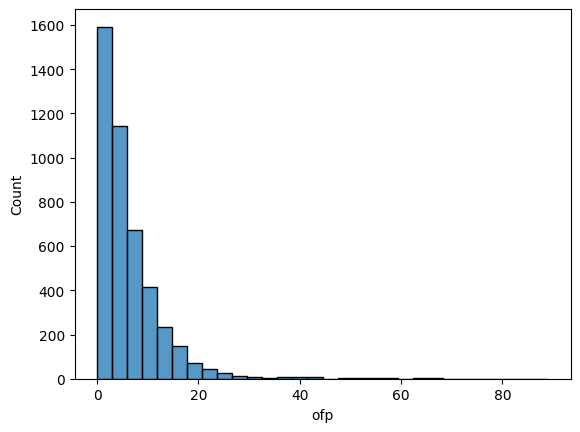

In [6]:
sns.histplot(data=df['ofp'], bins=30)

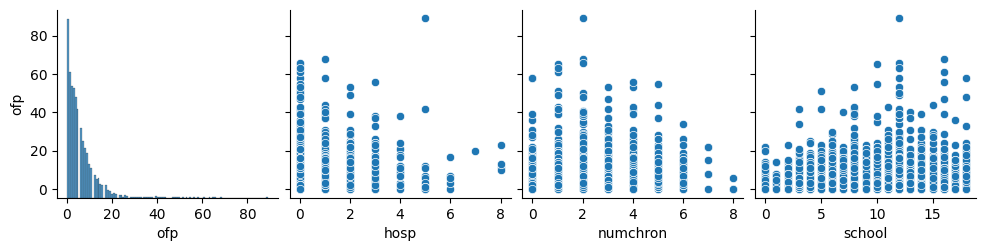

In [7]:
#Analisando a relação com todos os outros atributos
sns.pairplot(data=df, y_vars='ofp')

### 1.2 Educação (school)

In [8]:
limite=[0,5,10,15,20]
nome_limite = ['0-5','5-10','10-15','15-20']

df['faixa_school'] = pd.cut(x=df['school'],bins=limite, labels=nome_limite, right=False, include_lowest=True)

Text(0.5, 0, 'Quantidade de consultas')

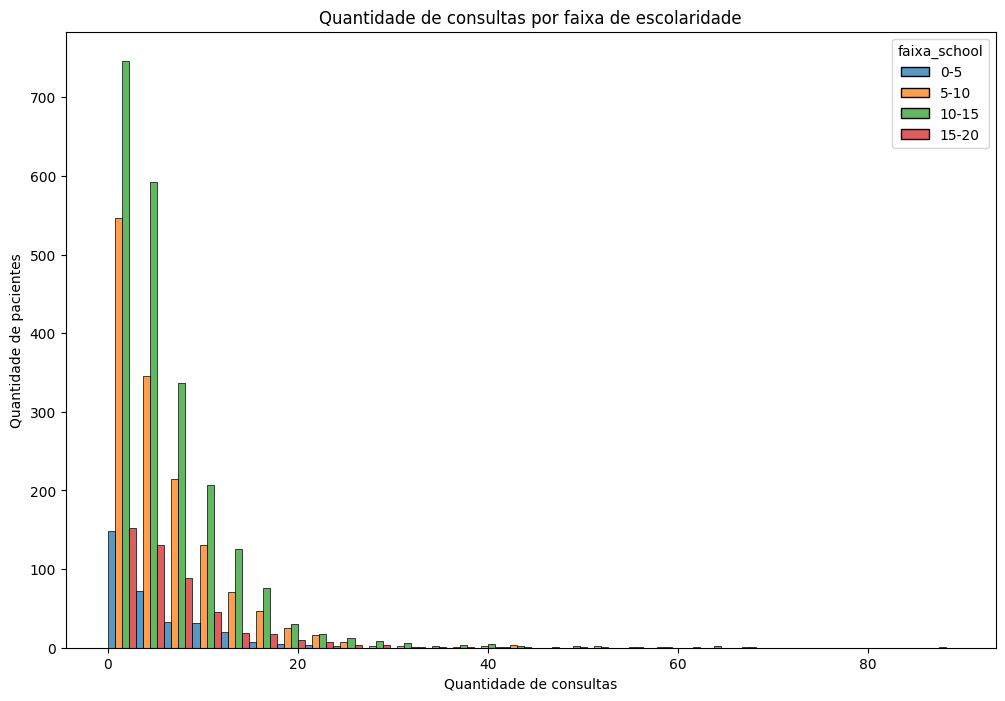

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='ofp', hue='faixa_school', bins=30, multiple='dodge')
plt.title('Quantidade de consultas por faixa de escolaridade')
plt.ylabel('Quantidade de pacientes')
plt.xlabel('Quantidade de consultas')

In [10]:
df['faixa_school'].value_counts()

faixa_school
10-15    2178
5-10     1415
15-20     488
0-5       325
Name: count, dtype: int64

Pensando ainda na faixa de escolaridade, como as pessoas, com o conhecimento que elas adquirem com o passar do tempo, se relacionam com a percepção do seu autoestado? Farei um crosstab para averiguar essa ideia.

In [11]:
pd.crosstab(df['health'], df['faixa_school'], values=df['ofp'], aggfunc='count', 
            normalize=True, margins=True)*100

faixa_school,0-5,5-10,10-15,15-20,All
health,,,,,
average,5.129369,25.102133,40.671811,8.738084,79.641398
excellent,0.476623,1.861099,3.699501,1.747617,7.784839
poor,1.770313,5.152065,5.061280,0.590104,12.573763
All,7.376305,32.115297,49.432592,11.075806,100.000000


In [12]:
#Pensando na questão 3
limite=[0,10,20,30,40,100]
nome_limite=['0-10','10-20','20-30','30-40','40+']

df['faixa_consulta'] = pd.cut(df['ofp'],bins=limite, labels=nome_limite, include_lowest=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ofp             4406 non-null   int32   
 1   hosp            4406 non-null   int32   
 2   health          4406 non-null   category
 3   numchron        4406 non-null   int32   
 4   gender          4406 non-null   category
 5   school          4406 non-null   int32   
 6   privins         4406 non-null   category
 7   faixa_school    4406 non-null   category
 8   faixa_consulta  4406 non-null   category
dtypes: category(5), int32(4)
memory usage: 254.6+ KB


In [14]:
tabela=pd.crosstab(df['faixa_school'], df['faixa_consulta'], values=df['ofp'], aggfunc='count').stack(0)

In [15]:
total_por_escolaridade=df.groupby('faixa_school')['school'].count()

In [16]:
#Porcentagem por escolaridade.
((tabela/total_por_escolaridade)*100).unstack(0).T

faixa_consulta,0-10,10-20,20-30,30-40,40+
faixa_school,,,,,
0-5,83.692308,13.846154,1.846154,0.307692,0.307692
5-10,85.159011,12.367491,1.837456,0.282686,0.353357
10-15,83.700643,13.269054,1.836547,0.642792,0.550964
15-20,82.991803,12.090164,2.868852,0.614754,1.434426


### 1.3 Internações (hosp)

<Axes: xlabel='ofp', ylabel='Count'>

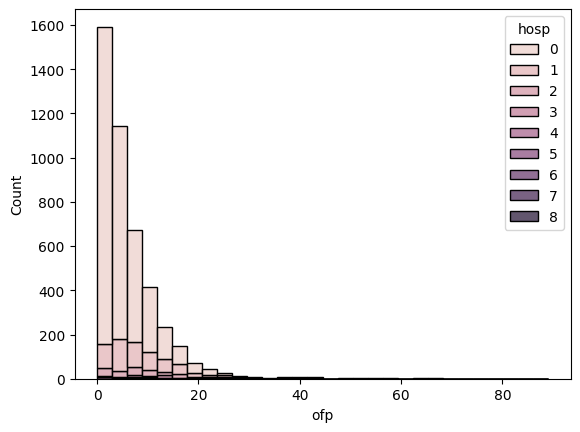

In [17]:
sns.histplot(data=df, x='ofp', hue='hosp', bins=30, multiple='stack')

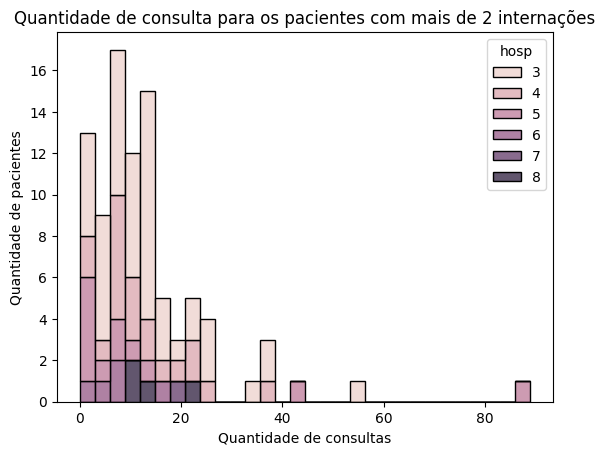

In [18]:
ax=sns.histplot(data=df.query('hosp>2'), x='ofp', hue='hosp', bins=30, multiple='stack')
plt.title('Quantidade de consulta para os pacientes com mais de 2 internações')
plt.ylabel('Quantidade de pacientes')
plt.xlabel('Quantidade de consultas')
ax=ax

### 1.4 Doenças crônicas (numchron)

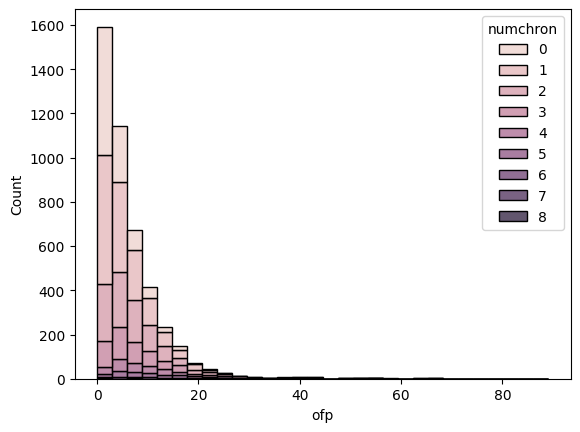

In [19]:
ax=sns.histplot(data=df, x='ofp', hue='numchron', bins=30, multiple='stack')

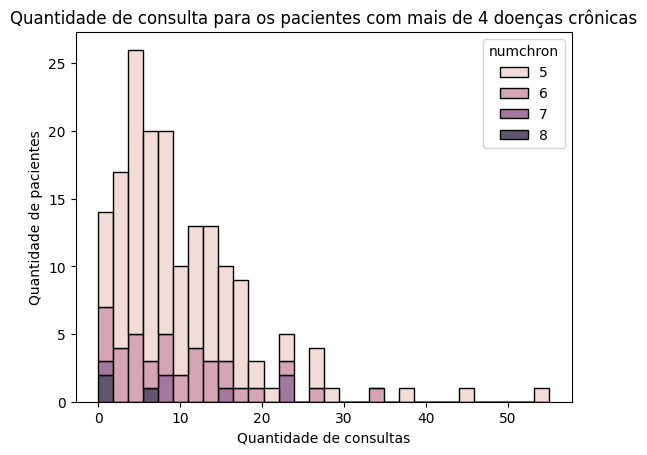

In [20]:
ax=sns.histplot(data=df.query('numchron>4'), x='ofp', hue='numchron', bins=30, multiple='stack')
plt.title('Quantidade de consulta para os pacientes com mais de 4 doenças crônicas')
plt.ylabel('Quantidade de pacientes')
plt.xlabel('Quantidade de consultas')
ax=ax

In [21]:
df['numchron'].value_counts()

numchron
1    1498
0    1025
2     968
3     525
4     220
5     127
6      34
7       6
8       3
Name: count, dtype: int64

### 1.5 Convênio (privins)

In [22]:
df['privins'].value_counts()

privins
yes    3421
no      985
Name: count, dtype: int64

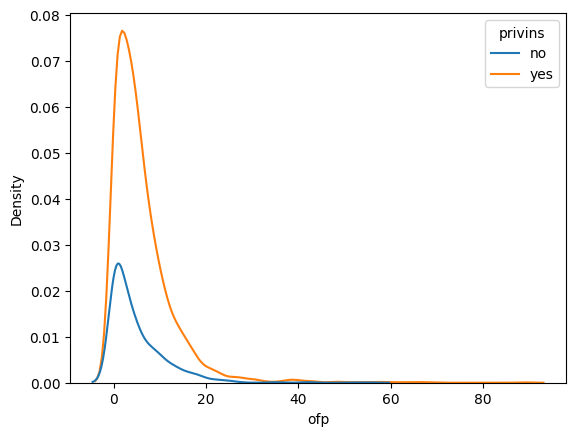

In [23]:
ax=sns.kdeplot(data=df, x=df['ofp'], hue='privins')

É interessante pensar no atributo de convênio e associar ele a anos de escolaridade. Por isso vou fazer um crosstab que tenta estabelecer a relação entre os dois, definindo a quantidade de pacientes associados a cada categorização.

In [24]:
pd.crosstab(df['privins'], df['faixa_school'], values=df['ofp'],aggfunc='count', normalize=True, margins=True)*100

faixa_school,0-5,5-10,10-15,15-20,All
privins,,,,,
no,4.448479,9.918293,7.126645,0.862460,22.355878
yes,2.927826,22.197004,42.305946,10.213345,77.644122
All,7.376305,32.115297,49.432592,11.075806,100.000000


In [25]:
tabela=pd.crosstab(df['privins'], df['faixa_consulta'], values=df['ofp'], aggfunc='count').stack(0)
tabela

privins  faixa_consulta
no       0-10               844
         10-20              119
         20-30               16
         30-40                2
         40+                  4
yes      0-10              2861
         10-20              449
         20-30               70
         30-40               20
         40+                 21
dtype: int64

In [26]:
total_por_convenio=df.groupby('privins')['ofp'].count()

In [27]:
#Porcentagem por convenio.
((tabela/total_por_convenio)*100).unstack(0).T

faixa_consulta,0-10,10-20,20-30,30-40,40+
privins,,,,,
no,85.685279,12.081218,1.624365,0.203046,0.406091
yes,83.630517,13.124817,2.046185,0.584624,0.613856


### 1.6 Gênero (gender)

In [28]:
df['gender'].value_counts()

gender
female    2628
male      1778
Name: count, dtype: int64

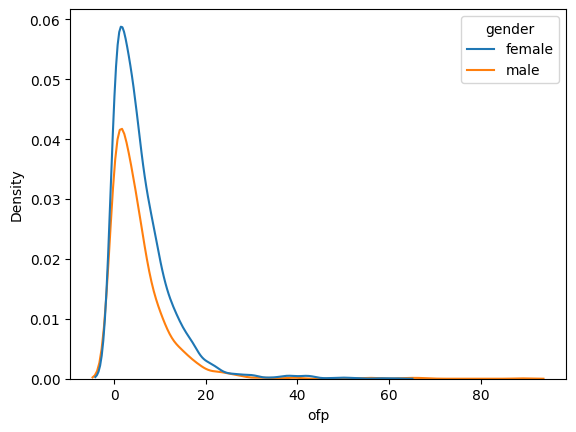

In [29]:
ax=sns.kdeplot(data=df, x=df['ofp'], hue='gender')

<Axes: xlabel='gender', ylabel='ofp'>

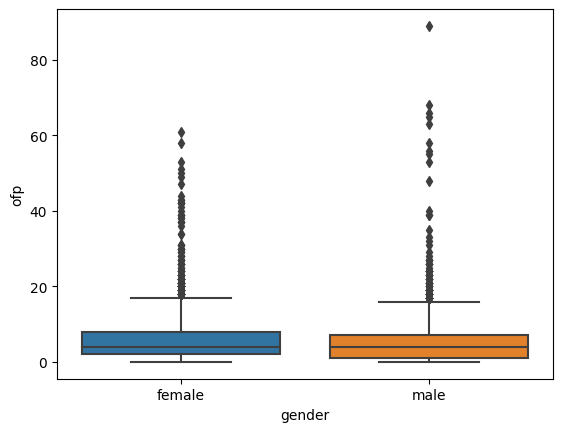

In [30]:
sns.boxplot(data=df, x=df['gender'], y=df['ofp'])

In [31]:
tabela=pd.crosstab(df['gender'], df['faixa_consulta'], values=df['ofp'], aggfunc='count').stack(0)

In [32]:
total_por_genero=df.groupby('gender')['school'].count()

In [33]:
#Porcentagem por genero.
((tabela/total_por_genero)*100).unstack(0).T

faixa_consulta,0-10,10-20,20-30,30-40,40+
gender,,,,,
female,82.762557,14.117199,1.978691,0.570776,0.570776
male,86.051744,11.079865,1.912261,0.393701,0.562430


### 1.7 Saúde (health)

In [34]:
df['health'].value_counts()

health
average      3509
poor          554
excellent     343
Name: count, dtype: int64

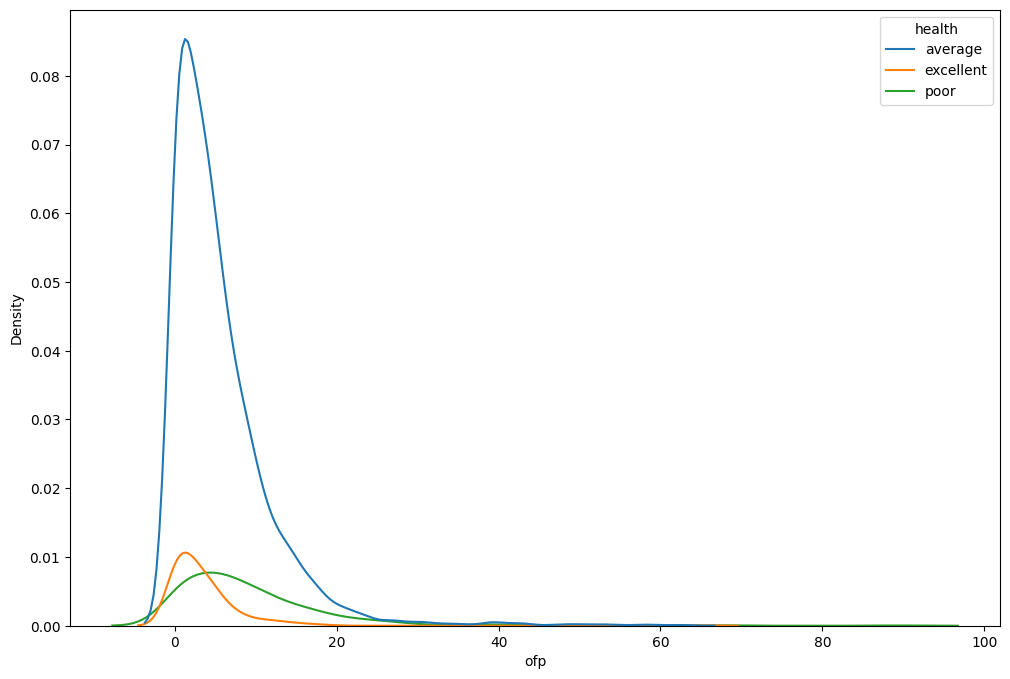

In [35]:
plt.figure(figsize=(12,8))
ax=sns.kdeplot(data=df,x=df['ofp'], hue='health')

In [36]:
tabela=pd.crosstab(df['health'], df['faixa_consulta'], values=df['ofp'], aggfunc='count').stack(0)

In [37]:
total_por_saude=df.groupby('health')['school'].count()

In [38]:
#Porcentagem por saude.
((tabela/total_por_saude)*100).unstack(0).T

faixa_consulta,0-10,10-20,20-30,30-40,40+
health,,,,,
average,85.608435,11.912226,1.510402,0.455970,0.512967
excellent,93.586006,6.122449,0.000000,0.000000,0.291545
poor,68.592058,23.285199,5.956679,1.083032,1.083032


### 1.8 Conclusão de Análise
Através desses gráficos podemos tirar algumas conclusões e até chegar a algumas hipóteses no qual podemos pensar. O interessante de estabelecer essas relações é tentar tirar insights que podem nos ajudar a chegar conclusões em cima do dataset fornecido. 

**Visão Geral**

O primeiro gráfico é um histograma sobre a quantidade de consultas de todos os pacientes, e é de se esperar que a maioria tem uma quantidade baixa de consultas e quanto maior a quantidade de consultas é esperado uma diminuição consideravel na quantidade de pacientes. Então nada fora do comum para ser estabelecer aqui.


Além disso, no segundo gráfico em que é feito um *pairplot*, analisamos todas as relações entre atributos numéricos do dataset. Como os valores não são contínuos, eles apresentam essas faixas verticais que mostram a quantidade de casos associados com a quantidade de consultas. Cada um deles ficará mais bem explicado com o passar dos tópicos.


**Educação**

Em relação a educação, fiz um agrupamento por conjunto de anos, entre 0 e 5 anos de estudo, entre 5 e 10, 10 e 15, e de 15 para cima. A ideia de fazer isso é de não ter que fazer uma linha ou barra para cada quantidade de anos, e sim definir um grupo associado, pacientes com baixa, média e alta escolaridade.

No primeiro histograma, faço a separação por escolaridade e podemos ver que duas faixas de escolaridade se destacam em relação a quantidade de consultas. Em primeiro lugar é a faixa de escolaridade de 10 a 15 anos e logo depois é de 5 a 10 anos. As outras duas faixas apresentaram uma quantidade de casos bem menores.

Respondendo a **questão 3**, em relação a quantidade de consultas variando de acordo com o nível de escolaridade, não podemos nos precipitar olhando o gráfico e pensar que o casos que tem mais de 15 anos tendem a não ter tantas consultas e nem pensar que por causa da quantidade, entre 5 e 15 o pessoal tem mais consultas. Isso é porque na população da amostra de 4406 pacientes, existe uma quantidade diferente de paciente por grau de escolaridade. Para ter a certeza do que estamos afirmando vamos analisar a porcentagem de cada grau de escolaridade em relação ao seu próprio total, ou seja, de cada nível de escolaridade, qual é a porcentagem que tem tantas consultas? Isso nós podemos ver depois na tabela de porcentagem por escolaridade e vemos que os valores são bem próximos! Vemos que para todos os graus de escolaridade aproximadamente 83% foram de 0 a 10 consultas médicas, 13% foram de 10 a 20 consultas e assim os valores vão se mantendo próximos! Portanto vemos que o número de consultas não altera por nível de escolaridade!

**Internações e Doenças crônicas**

Para esses dois pontos nós vemos uma interação bem parecida com a quantidade de consultas médicas. Tantos os casos com maior quantidade de internações quanto a de doenças crônicas nós vemos um comportamento parecido de pequenas quantidades de consultas, que são menores que 10. O que me faz pensar em duas possibilidades: Ou os pacientes depois de 10 consultas vieram a óbito, pela quantidade de internações e doenças associadas não foi possível continuar com o paciente. Ou depois de uma certa quantidade de consultas o paciente parou de ser rastreado ou decidiu mudar o local que tinha suas consultas. Mas devido ao meu conhecimento limitado em relação ao dataset, não é possível afirmar qual seria a situação mais provável, então vamos ficar por aqui por essas hipóteses.

**Convênio**

Para a análise em cima do convênio, nós temos uma quantidade maior de pacientes com convênio. Levando assim a ter uma maior quantidade de casos com convênio para todas as quantidades de consulta. Para analisar se houver um aumento de consultas médicas com a utilização de convênio, precisamos analisar pela quantidade de consultas por convênio separadamente.

A análise é feita pela tabela que mostra a porcentagem associada por convênio, e é possível ver que as porcentagens entre os convênios é bem parecido, tanto para pacientes com convênio quanto sem, ambos tiveram uma quantidade próxima de 83% entre 0 e 10 consultas, e também se repete para outra faixas de consultas. Isso mostra, respondendo a **questão 2**, que a quantidade de consultas não aumenta por convênio.


**Gênero** 

Da mesma forma que os atributos de Escolaridade e Convênio, para analisarmos como os gêneros se comportam em relação à quantidade de consultas, nós devemos tratar em relação as suas porcentagens respectivas. É tratado dessa forma pois há mais pacientes do gênero feminino do que masculino.

Assim, quando fazemos a tabela com as porcentagens por gênero, analisamos que entre 0 e 10 consultas, homens tendem a ter mais consultas, com uma diferença de 4%. Contudo entre 10 e 20 consultas, mulheres apresentam maior quantidade de consultas, com 3% a mais. Os próximos intervalos de quantidade de consulta volta a se tornar igual. Porém com essa informação importa para ver que inicialmente homens tendem a ir mais para consultas, mas depois de um certo ponto parecem não voltar mais, como as mulheres. Isso responde a **questão 4**.


**Saúde**

Para o quesito de saúde, nós estamos analisando de acordo com o estado de saúde autopercebido, ou seja, a visão que o paciente tem em relação ao estado de saúde dele. Esses estados foram definidos de 3 formas: 'average', 'excellent' e 'poor', como a quantidade entre eles é diferente pelo dataset, precisamos checar cada caso separadamente para ver se a quantidade de consultas médicas varia por percepção do próprio paciente.

Fazendo a tabela e vendo os resultados, checamos que os valores variam bastante! Vamos falar de cada um separado:
* Average: Tem as porcentagens similares aos outros casos, se mantendo bem parecido com as quantidade por convênio e escolaridade, por padrão, 85% tem em torno de 0 a 10 consultas e os valores vão diminuindo de acordo com os outros.
* Excellent: Pacientes que definiram com saúde excelente tem sua maior concentração no intervalo de 0 a 10 consultas, e valores muito menores para maiores quantidade de consultas. Portanto pacientes que acharam que estavam ótimos, tiveram poucas consultas.
* Poor: Pacientes que acharam seu estado de saúde 'pobre' tem uma quantidade bem menor de pacientes no intervalo de 0 a 10 consultas e os outros valores são mais altos, fazendo uma distribuição maior entre os intervalos. Isso implica dizer que aqueles que acharam que estavam mal, fizeram maior quantidade de consultas médicas.

Essa análise ajuda a visualizar algo que o gráfico não nos ajuda, e com isso respondemos a **questão 1**, mostrando que a percepção do paciente de fato se coorelaciona com a quantidade de consultas que o mesmo teve.

## 2. Regressão de Poisson

Para fazer a regressão, vamos estabelecer inicialmente o que precisa ser feito, para depois fazermos. Sair fazendo para só sairá um resultado que não será de nosso interesse (Garbage In, Garbage Out).

Definindo ordem:
1. Tratar variáveis categóricas. (*One Hot Encoding*)
2. Checar correlação entre variáveis.
3. Separar em variáveis de treino e teste.
4. Feature Scaling (*Normalização*)
5. Modelagem
6. Treino e Predição
7. Avaliação do modelo treinado



Obs: Entre o tópico 4 e 5 poderia haver o tratamento de Missing Data, contudo como o dataset está completo não haverá necessidade.

In [39]:
#Tirando colunas desnecessárias que criei para análise.
df.drop(['faixa_school','faixa_consulta'],axis=1, inplace=True,)

### 2.1 Variáveis categóricas

In [40]:
#Resolvendo a coluna de Gender
gender = {
  'female' : 0,
  'male': 1
}

privins = {
  'no' : 0,
  'yes': 1
}

df['gender'].replace(gender, inplace=True)
df['privins'].replace(privins, inplace=True)

In [41]:
df['gender']=df['gender'].astype('int32')
df['privins']=df['privins'].astype('int32')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ofp       4406 non-null   int32   
 1   hosp      4406 non-null   int32   
 2   health    4406 non-null   category
 3   numchron  4406 non-null   int32   
 4   gender    4406 non-null   int32   
 5   school    4406 non-null   int32   
 6   privins   4406 non-null   int32   
dtypes: category(1), int32(6)
memory usage: 271.2+ KB


In [43]:
cat_columns = df.select_dtypes(include='category').columns.values
cat_columns

array(['health'], dtype=object)

In [44]:
for elem in cat_columns:
  print(elem, df[elem].unique())

health ['average', 'poor', 'excellent']
Categories (3, object): ['average', 'excellent', 'poor']


In [45]:
df = pd.concat([df.drop(cat_columns,axis=1),pd.get_dummies(df[cat_columns], prefix=cat_columns)],axis=1)

### 2.2 Correlação entre variáveis 

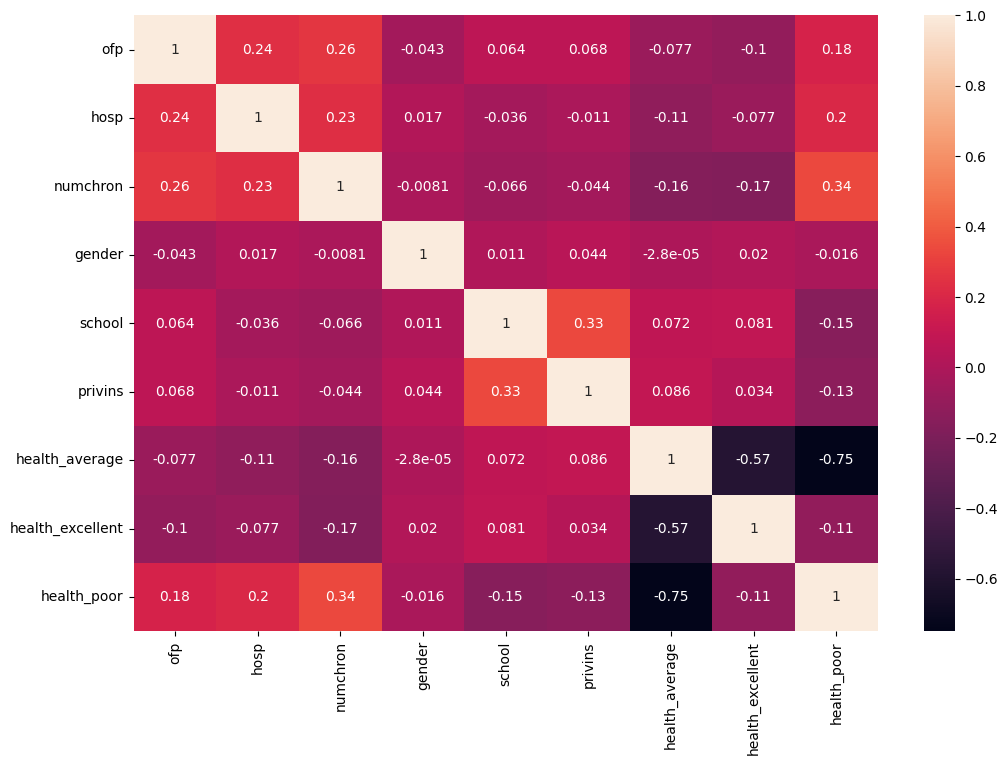

In [46]:
plt.figure(figsize=(12,8))
ax=sns.heatmap(df.corr(), annot=True)

### 2.3 Separação em Treino e Teste

In [47]:
from sklearn.model_selection import train_test_split